[]
./gestures/ONE_Transcription_Right_Hand.csv
                time  index     x_angle     y_angle     z_angle         x   
294  00:00:01.688680      0  271.192450   15.598452  344.398334  0.403693  \
295  00:00:01.688680      1  270.869724  357.139850    2.860479  0.406804   
296  00:00:01.688680      2  272.342187  335.898667   24.119187  0.421466   
297  00:00:01.688680      3  306.051445  276.284902   84.911667  0.437492   
298  00:00:01.688680      4  151.389875   35.169639  235.801026  0.426261   
299  00:00:01.688680      5  268.715344  354.268720    5.732711  0.433654   
300  00:00:01.688680      6  271.313138  352.537675    7.464263  0.438843   
301  00:00:01.688680      7  270.283118  352.529435    7.470655  0.442957   
302  00:00:01.688680      8   90.019101  357.769841  177.769841  0.449103   
303  00:00:01.688680      9  268.326827    0.550576  359.449189  0.448639   
304  00:00:01.688680     10   73.137885   29.218353  210.303242  0.439647   
305  00:00:01.688680     11  

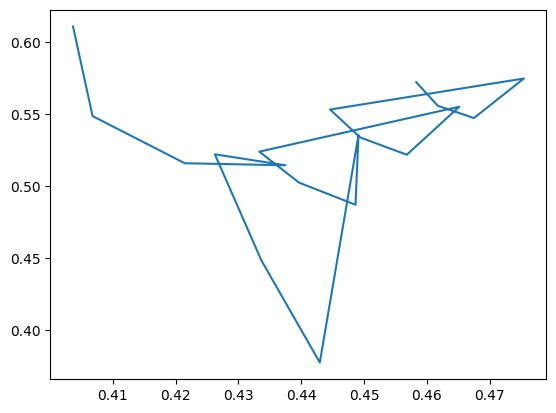

In [38]:
# Loop through a list of images, compare the output with the alg. Compare the output to what is defined.
# How do we handle not still images? Do we train on not still images? Classification
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

mypath = './gestures'

print(glob.glob("./gestures/ONE.csv"))
gesture_files = glob.glob("./gestures/ONE*.csv")

# start at the first five.. TODO: remove
for indx, gesture_file in enumerate(gesture_files):
  if indx < 2:
    continue
  if indx > 2:
    break
  
  print(gesture_file)
  
  df = pd.read_csv(gesture_file)
  
  # Parse the time from string.
  df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.time
  
  sdf = np.sort(df['time'].to_numpy(), axis=0)
  
  # Get the lower level bound median
  ts_median = sdf[math.floor(len(sdf) / 2 )]
  
  # Get the static point image/gesture...
  ndf = df[df['time'].isin([ts_median])]
  print(ndf)
  plt.plot(ndf['x'], ndf['y'])
  # print(df.columns)